In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer

import warnings

warnings.filterwarnings(action = 'ignore')

### 1. 데이터 로드 및 데이터프레임 정리

In [2]:
tmp_df = pd.read_csv('../data/행정동_기준_동별데이터_버스추가_1028.csv')
pd.set_option('display.max_columns',35)
tmp_df.rename(columns={'Unnamed: 0':'index'},inplace=True)
tmp_df.set_index('index',inplace=True)

In [4]:
tmp_df.columns

Index(['SUBWAY_NUM', 'STARBUCKS_NUM', 'SPORT_NUM', 'SAFE_DLVR_NUM',
       'POLICE_NUM', 'PHARM_NUM', 'NOISE_VIBRATION_NUM', 'MID_SCH_NUM',
       'MC_NUM', 'LEISURE_NUM', 'KINDER_NUM', 'KIDS_NUM', 'HOSPITAL_NUM',
       'HIGH_SCH_NUM', 'GYM_NUM', 'GOLF_NUM', 'FIRE_NUM', 'ELE_SCH_NUM',
       'DPTM_NUM', 'CON_NUM', 'CHILD_MED_NUM', 'CCTV_NUM', 'CAR_SHR_NUM',
       'CAFE_NUM', 'BUS_NUM', 'BIKE_NUM', 'ANI_HSPT_NUM', 'ACADEMY_NUM', 'GU',
       'DONG', 'DONG_CODE', 'BUS_CNT'],
      dtype='object')

In [5]:
tmp_df = tmp_df[['GU','DONG','DONG_CODE','SUBWAY_NUM','STARBUCKS_NUM','SPORT_NUM','SAFE_DLVR_NUM','POLICE_NUM','PHARM_NUM','NOISE_VIBRATION_NUM','MID_SCH_NUM','MC_NUM','LEISURE_NUM','KINDER_NUM','KIDS_NUM','HOSPITAL_NUM','HIGH_SCH_NUM','GYM_NUM','GOLF_NUM','FIRE_NUM','ELE_SCH_NUM','DPTM_NUM','CON_NUM','CHILD_MED_NUM','CCTV_NUM','CAR_SHR_NUM','CAFE_NUM','BUS_NUM','BIKE_NUM','ANI_HSPT_NUM','ACADEMY_NUM','BUS_CNT']]
tmp_df

,GU,DONG,DONG_CODE,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,POLICE_NUM,PHARM_NUM,NOISE_VIBRATION_NUM,MID_SCH_NUM,MC_NUM,...,ELE_SCH_NUM,DPTM_NUM,CON_NUM,CHILD_MED_NUM,CCTV_NUM,CAR_SHR_NUM,CAFE_NUM,BUS_NUM,BIKE_NUM,ANI_HSPT_NUM,ACADEMY_NUM,BUS_CNT
index,,,,,,,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,0.333333,0.333333,0.0,1.000000,2.000000,4.333333,18816.000000,2.000000,0.0,...,2.000000,0.0,4.000000,7.333333,56.666667,1.000000,39.666667,11.666667,5.666667,2.000000,18.000000,14.0
1,종로구,사직동,1111053000,1.333333,7.333333,0.0,0.000000,3.000000,17.333333,22848.000000,0.000000,0.0,...,2.000000,0.0,20.000000,10.333333,41.666667,5.000000,100.666667,18.666667,11.666667,1.000000,19.000000,16.0
2,종로구,삼청동,1111054000,1.000000,1.000000,1.0,0.000000,1.000000,2.000000,14112.000000,1.000000,0.0,...,0.000000,0.0,2.000000,1.000000,22.000000,1.000000,52.000000,8.000000,7.000000,0.000000,2.000000,11.0
3,종로구,부암동,1111055000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,6048.000000,1.000000,0.0,...,4.000000,0.0,8.000000,5.000000,41.000000,5.000000,30.000000,18.000000,5.000000,3.000000,24.000000,9.0
4,종로구,평창동,1111056000,0.000000,1.000000,0.0,0.000000,1.000000,5.000000,4032.000000,0.000000,0.0,...,0.000000,0.0,6.000000,10.000000,21.000000,0.000000,36.000000,25.000000,7.000000,0.000000,28.000000,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,0.333333,1.333333,0.0,0.666667,0.333333,12.666667,1442.333333,0.333333,0.0,...,1.333333,0.0,38.666667,4.000000,52.000000,6.666667,47.666667,11.000000,6.000000,2.666667,63.333333,11.0
422,강동구,성내3동,1174066000,0.333333,1.333333,0.0,0.666667,0.333333,12.666667,1442.333333,0.333333,0.0,...,1.333333,0.0,38.666667,4.000000,52.000000,6.666667,47.666667,11.000000,6.000000,2.666667,63.333333,9.0
423,강동구,길동,1174068500,1.000000,2.000000,0.0,1.000000,0.000000,35.000000,4327.000000,1.000000,0.0,...,6.000000,0.0,76.000000,10.000000,119.000000,10.000000,63.000000,22.000000,9.000000,8.000000,100.000000,28.0


In [6]:
density_df = pd.read_excel('../data/인구밀도.xlsx')
density_df

,GU,DONG,POP,AREA,DENSITY
0,종로구,사직동,9636,1.23,7834
1,종로구,삼청동,2739,1.49,1838
2,종로구,부암동,9782,2.27,4309
3,종로구,평창동,18329,8.87,2066
4,종로구,무악동,8297,0.36,23047
...,...,...,...,...,...
421,강동구,천호2동,33753,1.57,21499
422,강동구,길동,45973,2.17,21186
423,강동구,강일동,32982,2.26,14594
424,강동구,상일1동,38929,2.65,14690


In [8]:
tmp = pd.merge(tmp_df, density_df)
tmp = tmp[['GU','DONG','DONG_CODE','POP','AREA','DENSITY','SUBWAY_NUM','STARBUCKS_NUM','SPORT_NUM','SAFE_DLVR_NUM','POLICE_NUM','PHARM_NUM','NOISE_VIBRATION_NUM','MID_SCH_NUM','MC_NUM','LEISURE_NUM','KINDER_NUM','KIDS_NUM','HOSPITAL_NUM','HIGH_SCH_NUM','GYM_NUM','GOLF_NUM','FIRE_NUM','ELE_SCH_NUM','DPTM_NUM','CON_NUM','CHILD_MED_NUM','CCTV_NUM','CAR_SHR_NUM','CAFE_NUM','BUS_NUM','BIKE_NUM','ANI_HSPT_NUM','ACADEMY_NUM','BUS_CNT']]
col = tmp.columns[6:]
data = tmp[col].values
pd.set_option('display.max_columns',35)
tmp

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,POLICE_NUM,PHARM_NUM,NOISE_VIBRATION_NUM,MID_SCH_NUM,MC_NUM,LEISURE_NUM,KINDER_NUM,KIDS_NUM,HOSPITAL_NUM,HIGH_SCH_NUM,GYM_NUM,GOLF_NUM,FIRE_NUM,ELE_SCH_NUM,DPTM_NUM,CON_NUM,CHILD_MED_NUM,CCTV_NUM,CAR_SHR_NUM,CAFE_NUM,BUS_NUM,BIKE_NUM,ANI_HSPT_NUM,ACADEMY_NUM,BUS_CNT
0,종로구,청운효자동,1111051500,12177,2.57,4738,0.333333,0.333333,0.0,1.000000,2.000000,4.333333,18816.000000,2.000000,0.0,1.000000,0.000000,0.000000,11.666667,3.0,0.0,0.000000,1.0,2.000000,0.0,4.000000,7.333333,56.666667,1.000000,39.666667,11.666667,5.666667,2.000000,18.000000,14.0
1,종로구,사직동,1111053000,9636,1.23,7834,1.333333,7.333333,0.0,0.000000,3.000000,17.333333,22848.000000,0.000000,0.0,1.000000,10.000000,0.000000,74.666667,0.0,18.0,3.000000,0.0,2.000000,0.0,20.000000,10.333333,41.666667,5.000000,100.666667,18.666667,11.666667,1.000000,19.000000,16.0
2,종로구,삼청동,1111054000,2739,1.49,1838,1.000000,1.000000,1.0,0.000000,1.000000,2.000000,14112.000000,1.000000,0.0,0.000000,10.000000,0.000000,7.000000,1.0,3.0,0.000000,0.0,0.000000,0.0,2.000000,1.000000,22.000000,1.000000,52.000000,8.000000,7.000000,0.000000,2.000000,11.0
3,종로구,부암동,1111055000,9782,2.27,4309,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,6048.000000,1.000000,0.0,0.000000,0.000000,0.000000,4.000000,1.0,2.0,2.000000,1.0,4.000000,0.0,8.000000,5.000000,41.000000,5.000000,30.000000,18.000000,5.000000,3.000000,24.000000,9.0
4,종로구,평창동,1111056000,18329,8.87,2066,0.000000,1.000000,0.0,0.000000,1.000000,5.000000,4032.000000,0.000000,0.0,0.000000,0.000000,0.000000,14.000000,1.0,5.0,5.000000,0.0,0.000000,0.0,6.000000,10.000000,21.000000,0.000000,36.000000,25.000000,7.000000,0.000000,28.000000,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,0.333333,1.333333,0.0,0.666667,0.333333,12.666667,1442.333333,0.333333,0.0,1.666667,16.666667,0.666667,60.000000,0.0,10.0,4.666667,1.0,1.333333,0.0,38.666667,4.000000,52.000000,6.666667,47.666667,11.000000,6.000000,2.666667,63.333333,11.0
422,강동구,성내3동,1174066000,23346,0.71,32882,0.333333,1.333333,0.0,0.666667,0.333333,12.666667,1442.333333,0.333333,0.0,1.666667,16.666667,0.666667,60.000000,0.0,10.0,4.666667,1.0,1.333333,0.0,38.666667,4.000000,52.000000,6.666667,47.666667,11.000000,6.000000,2.666667,63.333333,9.0
423,강동구,길동,1174068500,45973,2.17,21186,1.000000,2.000000,0.0,1.000000,0.000000,35.000000,4327.000000,1.000000,0.0,3.000000,20.000000,1.000000,120.000000,0.0,18.0,9.000000,1.0,6.000000,0.0,76.000000,10.000000,119.000000,10.000000,63.000000,22.000000,9.000000,8.000000,100.000000,28.0
424,강동구,둔촌1동,1174069000,144,0.92,157,0.500000,0.000000,0.0,0.000000,1.000000,10.000000,2163.500000,1.500000,0.5,0.000000,0.000000,0.000000,14.500000,1.0,4.0,3.000000,0.0,2.000000,0.0,17.000000,0.000000,32.500000,2.000000,17.500000,7.000000,5.500000,1.500000,38.000000,4.0


In [11]:
tmp = tmp.drop(['CCTV_NUM','GYM_NUM','FIRE_NUM'],axis=1)

### 2. Elbow 확인

In [12]:
df = tmp.copy()

In [13]:
# 차원 축소 및 변환
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data)

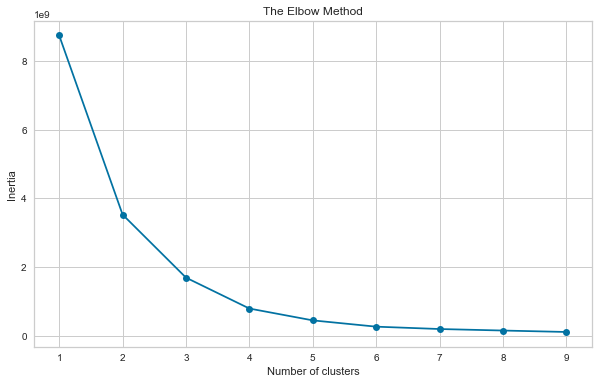

In [14]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### 2.1 1차 k-mens, N_cluster = 4

In [15]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(pca_transformed)

KMeans(n_clusters=3, random_state=0)

In [16]:
kmeans.labels_
df = tmp_df.copy()
df['km_cluster'] = kmeans.labels_
df.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,POLICE_NUM,PHARM_NUM,NOISE_VIBRATION_NUM,MID_SCH_NUM,MC_NUM,LEISURE_NUM,KINDER_NUM,KIDS_NUM,HOSPITAL_NUM,HIGH_SCH_NUM,GYM_NUM,GOLF_NUM,FIRE_NUM,ELE_SCH_NUM,DPTM_NUM,CON_NUM,CHILD_MED_NUM,CCTV_NUM,CAR_SHR_NUM,CAFE_NUM,BUS_NUM,BIKE_NUM,ANI_HSPT_NUM,ACADEMY_NUM,BUS_CNT
km_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
1,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


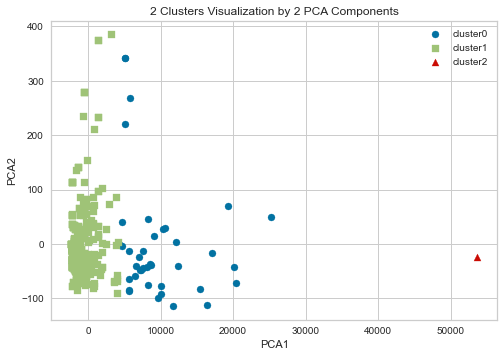

In [17]:
df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df[df['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df.loc[markers[i], 'pca_x'], y = df.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('2 Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2','cluster3'])
plt.show()

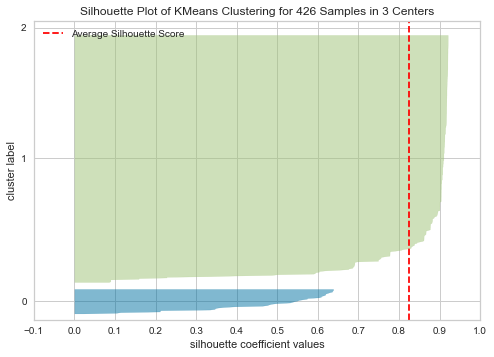

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [18]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed)      
visualizer.show()
# sil_avg = silhouette_score(data,kmeans.fit(pca_transformed))
# print(sil_avg)

In [29]:
score = silhouette_score(data,df['km_cluster'])
print('기본 데이터 셋 Silhouette Score : {0: .3f}'.format(score))

기본 데이터 셋 Silhouette Score :  0.824


### 2.2 2차 k-means

In [19]:
df_1 = df[df['km_cluster'] == 0]
df_1 = df_1.drop('km_cluster',axis=1)
df_1

,GU,DONG,DONG_CODE,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,POLICE_NUM,PHARM_NUM,NOISE_VIBRATION_NUM,MID_SCH_NUM,MC_NUM,LEISURE_NUM,KINDER_NUM,KIDS_NUM,HOSPITAL_NUM,HIGH_SCH_NUM,GYM_NUM,GOLF_NUM,FIRE_NUM,ELE_SCH_NUM,DPTM_NUM,CON_NUM,CHILD_MED_NUM,CCTV_NUM,CAR_SHR_NUM,CAFE_NUM,BUS_NUM,BIKE_NUM,ANI_HSPT_NUM,ACADEMY_NUM,BUS_CNT,pca_x,pca_y
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,0.333333,0.333333,0.0,1.000000,2.000000,4.333333,18816.000000,2.000000,0.0,1.0,0.000000,0.000000,11.666667,3.000000,0.000000,0.000000,1.000000,2.000000,0.0,4.000000,7.333333,56.666667,1.000000,39.666667,11.666667,5.666667,2.000000,18.000000,14.0,16363.106189,-111.731450
1,종로구,사직동,1111053000,1.333333,7.333333,0.0,0.000000,3.000000,17.333333,22848.000000,0.000000,0.0,1.0,10.000000,0.000000,74.666667,0.000000,18.000000,3.000000,0.000000,2.000000,0.0,20.000000,10.333333,41.666667,5.000000,100.666667,18.666667,11.666667,1.000000,19.000000,16.0,20395.455070,-71.408371
2,종로구,삼청동,1111054000,1.000000,1.000000,1.0,0.000000,1.000000,2.000000,14112.000000,1.000000,0.0,0.0,10.000000,0.000000,7.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.0,2.000000,1.000000,22.000000,1.000000,52.000000,8.000000,7.000000,0.000000,2.000000,11.0,11659.132820,-114.313582
6,종로구,교남동,1111058000,1.000000,4.000000,0.0,0.000000,1.000000,17.000000,12096.000000,2.000000,0.0,0.0,30.000000,1.000000,20.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.0,8.000000,6.000000,9.000000,0.000000,18.000000,12.000000,5.000000,1.000000,20.000000,13.0,9643.056495,-99.403218
7,종로구,가회동,1111060000,0.000000,2.000000,0.0,0.000000,0.000000,1.000000,8064.000000,1.000000,0.0,1.0,0.000000,0.000000,8.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.0,8.000000,3.000000,33.000000,0.000000,53.000000,15.000000,4.000000,0.000000,2.000000,9.0,5611.250676,-86.480708
9,종로구,종로5.6가동,1111063000,2.000000,0.000000,0.0,0.000000,2.000000,33.000000,10080.000000,0.000000,0.0,0.0,20.000000,0.000000,84.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.000000,33.000000,38.000000,0.000000,62.000000,13.000000,8.000000,0.000000,7.000000,11.0,7627.463294,-44.409674
11,종로구,혜화동,1111065000,1.000000,2.000000,0.0,1.000000,2.000000,18.000000,11088.000000,3.000000,1.0,3.0,0.000000,0.000000,28.000000,4.000000,5.000000,0.000000,0.000000,2.000000,0.0,17.000000,28.000000,72.000000,2.000000,70.500000,22.000000,9.500000,1.000000,40.500000,9.0,8635.451552,-38.117886
17,중구,소공동,1114052000,2.000000,9.000000,0.0,0.000000,1.000000,15.000000,10070.000000,1.000000,0.0,0.0,10.000000,0.000000,63.500000,2.500000,6.500000,3.000000,0.000000,2.000000,1.5,48.000000,20.500000,81.000000,8.500000,113.000000,24.000000,8.000000,0.000000,8.500000,24.0,7617.754152,-13.662175
18,중구,회현동,1114054000,3.000000,9.500000,0.0,0.000000,2.500000,16.000000,6890.000000,0.000000,0.0,0.0,20.000000,0.000000,65.000000,0.500000,5.000000,0.000000,0.500000,0.000000,0.5,41.000000,18.500000,94.000000,7.500000,111.500000,34.000000,13.000000,0.000000,1.500000,21.0,4437.810105,-2.651591


In [20]:
col_1 = df_1.columns[3:-2]
data_1 = df_1[col_1].values

In [21]:
pca_transformed_1 = pca.fit_transform(data_1)
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]
df_1

,GU,DONG,DONG_CODE,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,POLICE_NUM,PHARM_NUM,NOISE_VIBRATION_NUM,MID_SCH_NUM,MC_NUM,LEISURE_NUM,KINDER_NUM,KIDS_NUM,HOSPITAL_NUM,HIGH_SCH_NUM,GYM_NUM,GOLF_NUM,FIRE_NUM,ELE_SCH_NUM,DPTM_NUM,CON_NUM,CHILD_MED_NUM,CCTV_NUM,CAR_SHR_NUM,CAFE_NUM,BUS_NUM,BIKE_NUM,ANI_HSPT_NUM,ACADEMY_NUM,BUS_CNT,pca_x,pca_y
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,0.333333,0.333333,0.0,1.000000,2.000000,4.333333,18816.000000,2.000000,0.0,1.0,0.000000,0.000000,11.666667,3.000000,0.000000,0.000000,1.000000,2.000000,0.0,4.000000,7.333333,56.666667,1.000000,39.666667,11.666667,5.666667,2.000000,18.000000,14.0,6634.941499,-78.823577
1,종로구,사직동,1111053000,1.333333,7.333333,0.0,0.000000,3.000000,17.333333,22848.000000,0.000000,0.0,1.0,10.000000,0.000000,74.666667,0.000000,18.000000,3.000000,0.000000,2.000000,0.0,20.000000,10.333333,41.666667,5.000000,100.666667,18.666667,11.666667,1.000000,19.000000,16.0,10666.886858,-5.500177
2,종로구,삼청동,1111054000,1.000000,1.000000,1.0,0.000000,1.000000,2.000000,14112.000000,1.000000,0.0,0.0,10.000000,0.000000,7.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.0,2.000000,1.000000,22.000000,1.000000,52.000000,8.000000,7.000000,0.000000,2.000000,11.0,1931.006801,-104.138156
6,종로구,교남동,1111058000,1.000000,4.000000,0.0,0.000000,1.000000,17.000000,12096.000000,2.000000,0.0,0.0,30.000000,1.000000,20.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.0,8.000000,6.000000,9.000000,0.000000,18.000000,12.000000,5.000000,1.000000,20.000000,13.0,-85.050183,-102.536336
7,종로구,가회동,1111060000,0.000000,2.000000,0.0,0.000000,0.000000,1.000000,8064.000000,1.000000,0.0,1.0,0.000000,0.000000,8.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.0,8.000000,3.000000,33.000000,0.000000,53.000000,15.000000,4.000000,0.000000,2.000000,9.0,-4116.941567,-107.377189
9,종로구,종로5.6가동,1111063000,2.000000,0.000000,0.0,0.000000,2.000000,33.000000,10080.000000,0.000000,0.0,0.0,20.000000,0.000000,84.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.000000,33.000000,38.000000,0.000000,62.000000,13.000000,8.000000,0.000000,7.000000,11.0,-2101.035660,-41.241983
11,종로구,혜화동,1111065000,1.000000,2.000000,0.0,1.000000,2.000000,18.000000,11088.000000,3.000000,1.0,3.0,0.000000,0.000000,28.000000,4.000000,5.000000,0.000000,0.000000,2.000000,0.0,17.000000,28.000000,72.000000,2.000000,70.500000,22.000000,9.500000,1.000000,40.500000,9.0,-1092.960500,-47.710779
17,중구,소공동,1114052000,2.000000,9.000000,0.0,0.000000,1.000000,15.000000,10070.000000,1.000000,0.0,0.0,10.000000,0.000000,63.500000,2.500000,6.500000,3.000000,0.000000,2.000000,1.5,48.000000,20.500000,81.000000,8.500000,113.000000,24.000000,8.000000,0.000000,8.500000,24.0,-2110.910138,-16.078478
18,중구,회현동,1114054000,3.000000,9.500000,0.0,0.000000,2.500000,16.000000,6890.000000,0.000000,0.0,0.0,20.000000,0.000000,65.000000,0.500000,5.000000,0.000000,0.500000,0.000000,0.5,41.000000,18.500000,94.000000,7.500000,111.500000,34.000000,13.000000,0.000000,1.500000,21.0,-5290.882810,-20.619537


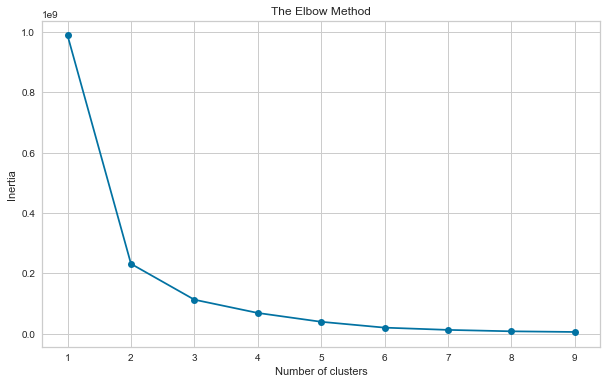

In [22]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_1)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [23]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# label
label_1 = kmeans.fit(pca_transformed_1)
# Getting unique labels
u_labels = np.unique(label_1)

In [24]:
df_1['km_cluster_1'] = kmeans.labels_
df_1.groupby('km_cluster_1').count()

,GU,DONG,DONG_CODE,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,POLICE_NUM,PHARM_NUM,NOISE_VIBRATION_NUM,MID_SCH_NUM,MC_NUM,LEISURE_NUM,KINDER_NUM,KIDS_NUM,HOSPITAL_NUM,HIGH_SCH_NUM,GYM_NUM,GOLF_NUM,FIRE_NUM,ELE_SCH_NUM,DPTM_NUM,CON_NUM,CHILD_MED_NUM,CCTV_NUM,CAR_SHR_NUM,CAFE_NUM,BUS_NUM,BIKE_NUM,ANI_HSPT_NUM,ACADEMY_NUM,BUS_CNT,pca_x,pca_y
km_cluster_1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
1,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18


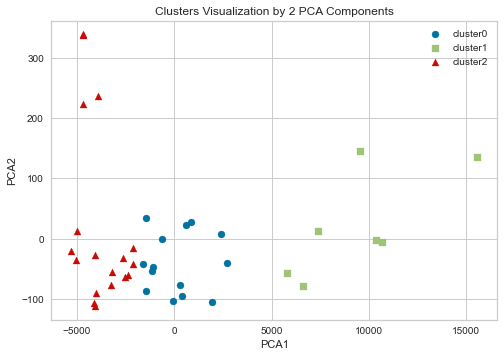

In [25]:
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_1['km_cluster_1'].unique())
markers = []
for i in range(marker_n):
    marker = df_1[df_1['km_cluster_1'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_1.loc[markers[i], 'pca_x'], y = df_1.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

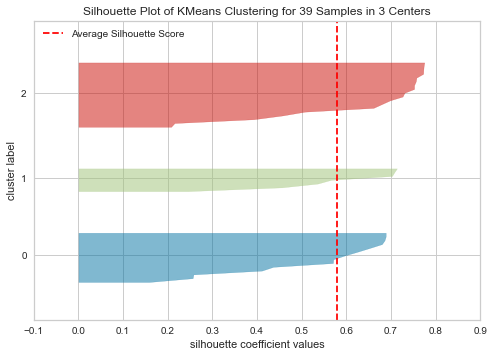

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 39 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [26]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed_1)      
visualizer.show()

In [28]:
score = silhouette_score(data_1,df_1['km_cluster_1'])
print('기본 데이터 셋 Silhouette Score : {0: .3f}'.format(score))

기본 데이터 셋 Silhouette Score :  0.577


In [38]:
def k_means_2(df):
    num = df['km_cluster'].unique()
    for x in num:
        tmp_df = df[df['km_cluster'] == x]
        tmp_df = tmp_df.drop('km_cluster',axis=1)

        col = tmp_df.columns[3:-2]
        data = tmp_df[col].values

        pca_transformed = pca.fit_transform(data)
        tmp_df['pca_x'] = pca_transformed[:,0]
        tmp_df['pca_y'] = pca_transformed[:,1]

        inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
        plt.figure(figsize=(10,6))
        for i in range(1, 10): # 군집 개수에 따른 
            kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
            kmeans.fit(pca_transformed)
            inertia.append(kmeans.inertia_)
        plt.plot(range(1, 10), inertia, marker='o')
        plt.title('The Elbow Method')
        plt.xlabel('Number of clusters')
        plt.ylabel('Inertia')
        plt.show()

        kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
        # label
        label_1 = kmeans.fit(pca_transformed)
        # Getting unique labels
        u_labels = np.unique(label_1)

        tmp_df['km_cluster_1'] = kmeans.labels_
        tmp_df.groupby('km_cluster_1').count()

        tmp_df['pca_x'] = pca_transformed[:,0]
        tmp_df['pca_y'] = pca_transformed[:,1]

        # 클러스터별 인덱스 추출
        marker_n = len(tmp_df['km_cluster_1'].unique())
        markers = []
        for i in range(marker_n):
            marker = tmp_df[tmp_df['km_cluster_1'] == i].index
            markers.append(marker)

        m = ['o','s','^','v','>']
        for i in range(marker_n):
            plt.scatter(x = tmp_df.loc[markers[i], 'pca_x'], y = tmp_df.loc[markers[i], 'pca_y'], marker = m[i])

        plt.xlabel('PCA1')
        plt.ylabel('PCA2')
        plt.title('Clusters Visualization by 2 PCA Components')
        plt.legend(['cluster0', 'cluster1','cluster2'])
        plt.show()

        # visualizer 생성
        visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
        # 생성 된 visualizer에 데이터 입력 
        visualizer.fit(pca_transformed)      
        visualizer.show()

        score = silhouette_score(data,tmp_df['km_cluster_1'])
        print('기본 데이터 셋 Silhouette Score : {0: .3f}'.format(score))

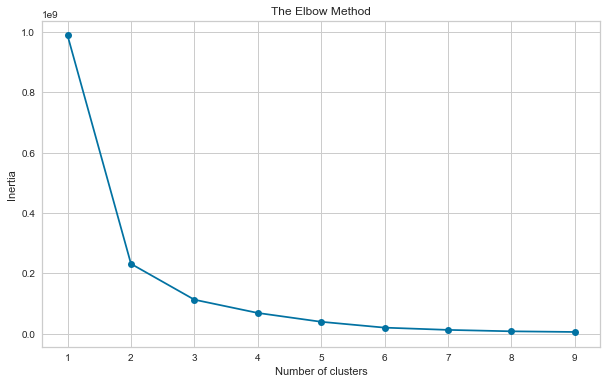

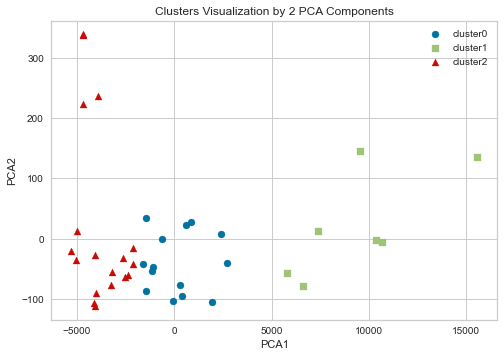

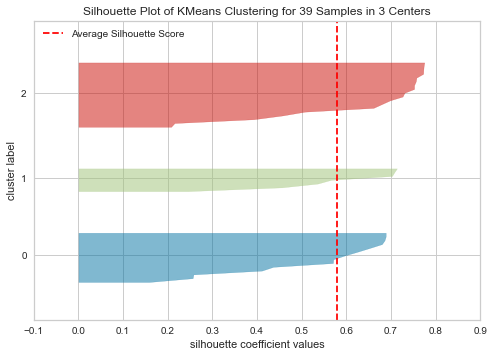

기본 데이터 셋 Silhouette Score :  0.577


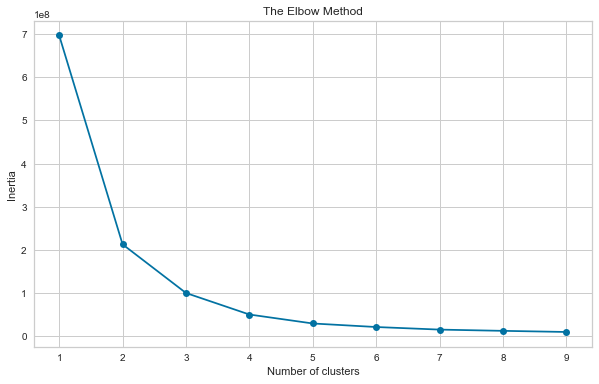

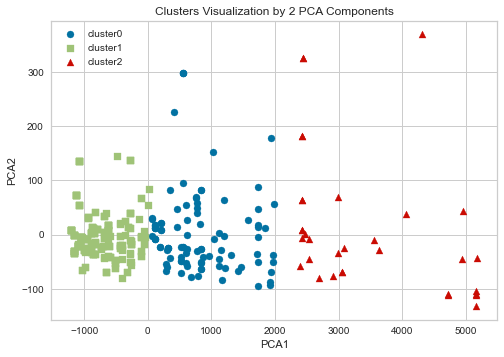

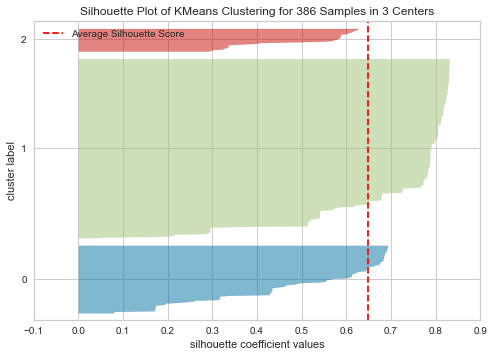

기본 데이터 셋 Silhouette Score :  0.642


ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [39]:
k_means_2(df)